In [68]:
import random

class R:
    def __init__(self, k):
        self.i = 0
        self.k = k
        self.reservoir = [0] * k

    def on_item(self, item):
        if self.i < self.k:
            self.reservoir[self.i] = item
        else:
            r = random.randint(0, self.i)
            if r < self.k:
                self.reservoir[r] = item

        self.i += 1

In [69]:
import pandas as pd

In [70]:
df = pd.read_csv(".data/bitcoin_data.csv")
df = df.filter(items=["Date", "Open"])

In [89]:
import numpy as np
from datetime import datetime

r = R(40)

for index, item in df.iterrows():
    r.on_item([item['Date'], item['Open']])

reservoir = np.array(r.reservoir)

df2 = pd.DataFrame({ 'Date': reservoir[:, 0], 'Open': reservoir[:,1]})
df2 = df2.astype({'Open': 'float32'})
df2 = df2.sort_values(by='Date', key=lambda d: pd.to_datetime(d))

In [90]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

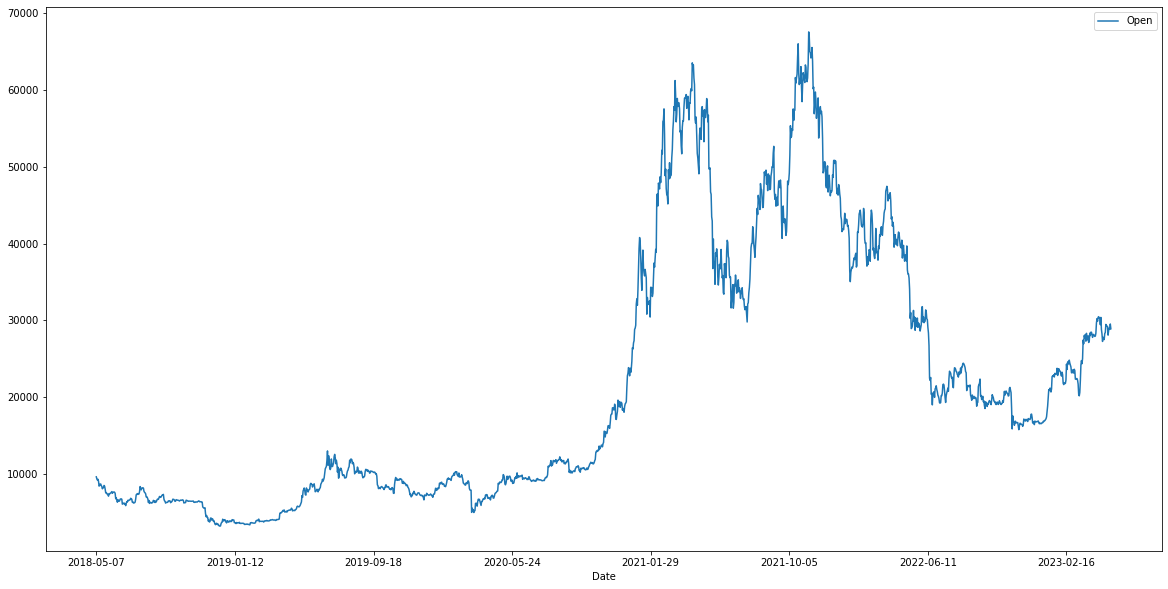

In [91]:
df.plot(x='Date', y='Open', figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

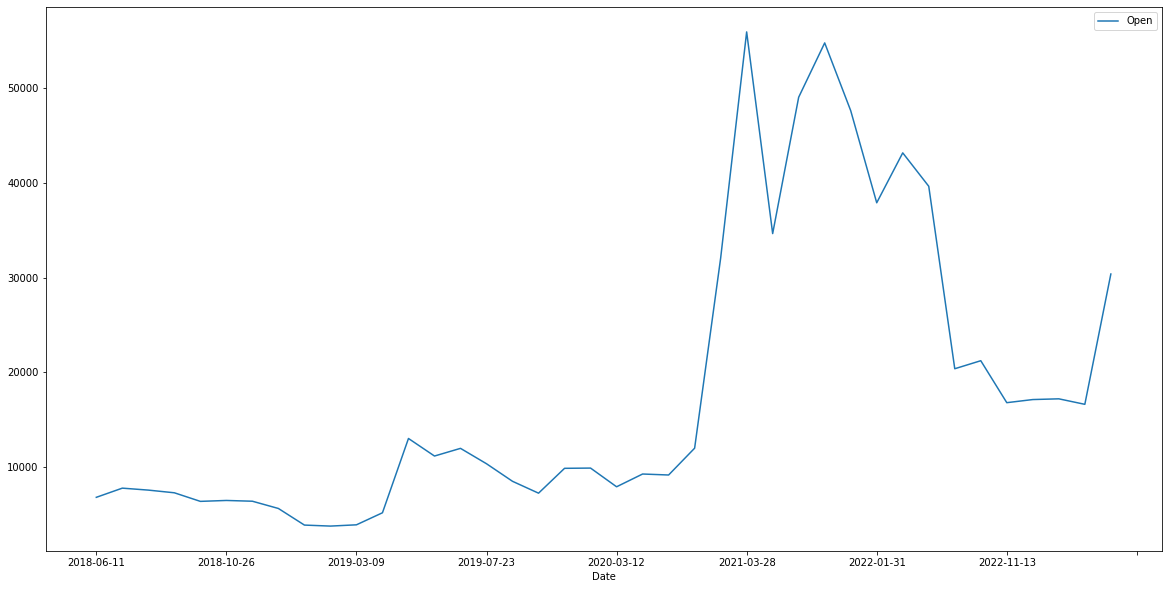

In [92]:
df2.plot(x='Date', y='Open', figsize=(20, 10))